# Part III: Perform Machine Learning
After collecting your data (Part I), exploratory data analysis (Part II), you're now ready to train models and get this party started.

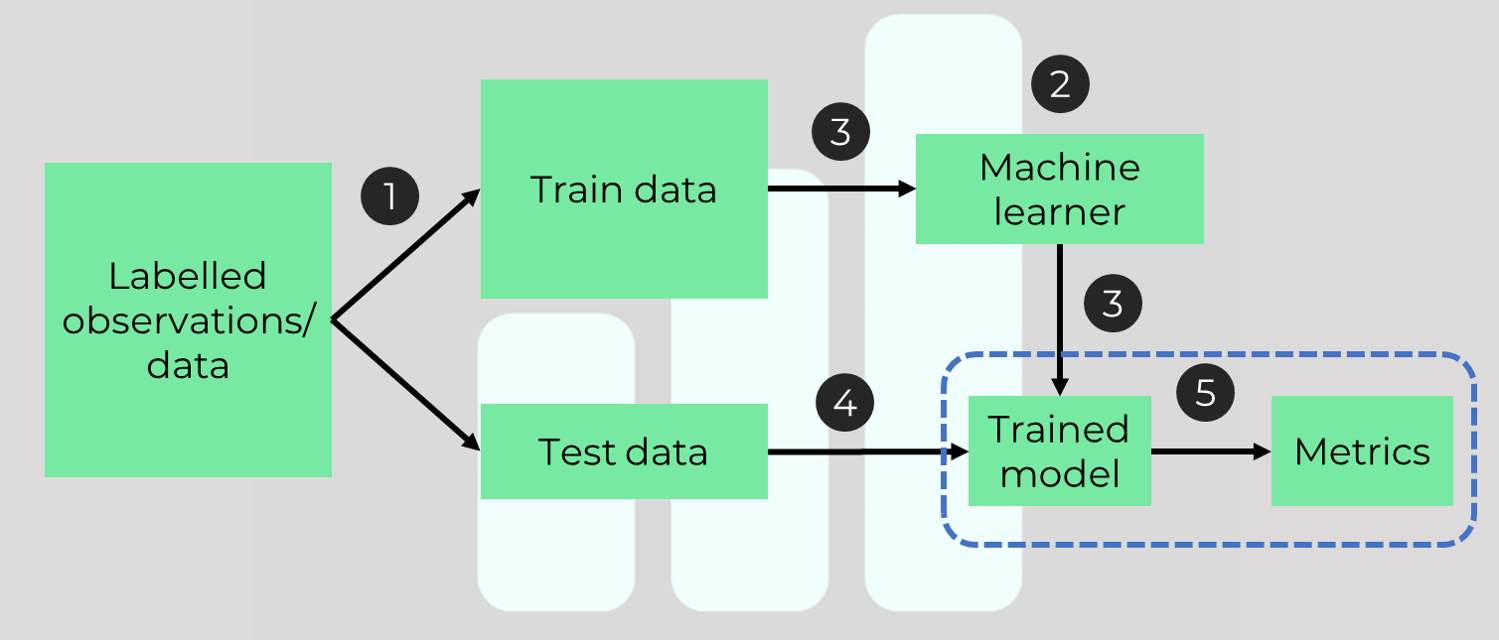

Generally, the machine learning process has five parts:
1. <strong>Split your data into train and test set</strong>
2. <strong>Model creation</strong>
<br>
Import your models from sklearn and instantiate them (assign model object to a variable)
3. <strong>model fitting</strong>
<br>
Fit your training data into the model and train train train
4. <strong>model prediction</strong>
<br>
Make a set of predictions using your test data, and
5. <strong>Model assessment</strong>
<br>
Compare your predictions with ground truth in test data

Highly recommended readings:
1. [Important] https://scipy-lectures.org/packages/scikit-learn/index.html
2. https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/
3. https://scikit-learn.org/stable/tutorial/basic/tutorial.html

### Step 1: Import your libraries
We will be using models from sklearn - a popular machine learning library. However, we won't import everything from sklearn and take just what we need. 

Import the following:
1. pandas
2. matplotlib.pyplot as plt
3. seaborn
4. numpy

In [1]:
# Step 1: Import your libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as py

### Step 2: Read your file from Part II and take only 2009-01-01 to 2019-01-01
You know the drill. You will have to:
1. Read your CSV into a DataFrame
2. Make sure you parse the dates 
3. Sort your DataFrame by DateTime index
4. Slice your DataFrame to have only data between 2009 and 2019 like Part III

Gentle reminder to make sure your DataFrame has the following:
- "1. open"
- "2. high"
- "3. low"
- "4. close"
- "5. volume"
- day
- day_of_month
- month

In [16]:
# Step 2: Read your CSV and slice the date such that you ony have 2009-2019 data
df = pd.read_csv('data_expanded_csv', index_col = 0)
df.index = pd.to_datetime(df.index)
df.sort_index()
#df = df['2009-01-01':'2019-01-01']
df

,1. open,2. high,3. low,4. close,5. volume,day,day_of_month,month
2020-09-08,0.5081,0.5081,0.5081,0.5081,0,1,8,9
2020-09-04,0.5081,0.5081,0.5081,0.5081,0,4,4,9
2020-09-03,0.5081,0.5081,0.5081,0.5081,0,3,3,9
2020-09-02,0.5081,0.5081,0.5081,0.5081,0,2,2,9
2020-09-01,0.5081,0.5081,0.5081,0.5081,0,1,1,9
...,...,...,...,...,...,...,...,...
2007-07-19,0.7900,0.7900,0.7900,0.7900,11000,3,19,7
2007-07-18,0.8000,0.8000,0.8000,0.8000,0,2,18,7
2007-07-17,0.8000,0.8000,0.8000,0.8000,0,1,17,7
2007-07-16,0.8000,0.8000,0.8000,0.8000,0,0,16,7


### Step 3: Dummify your data
We are going to extract more data from the existing columns, more specifially day, day_of_month, and month. We will turn the date features into dummies. 

Technically, the date features should not be considered as continuous, but rather as categorical variables. E.g., in month column, 1 is January and January is categorical data.

We will dummify the following columns:
1. day
2. day_of_month
3. month

Make sure when you dummify, you have prefixes for the dummy columns. 

E.g., day_1, day_2, ... , day_5 for <strong>day</strong>, month1, month2, ... , month12 for <strong>month</strong>.

<strong>Hint: Google "dummification in pandas" </strong>

In [ ]:
# Step 3: Dummify the day, day_of_month, and month columns and store each of them in a variable

### Step 4: Concatenate your three dummified data
After dummifying the columns, time to concatenate them into a single DataFrame.

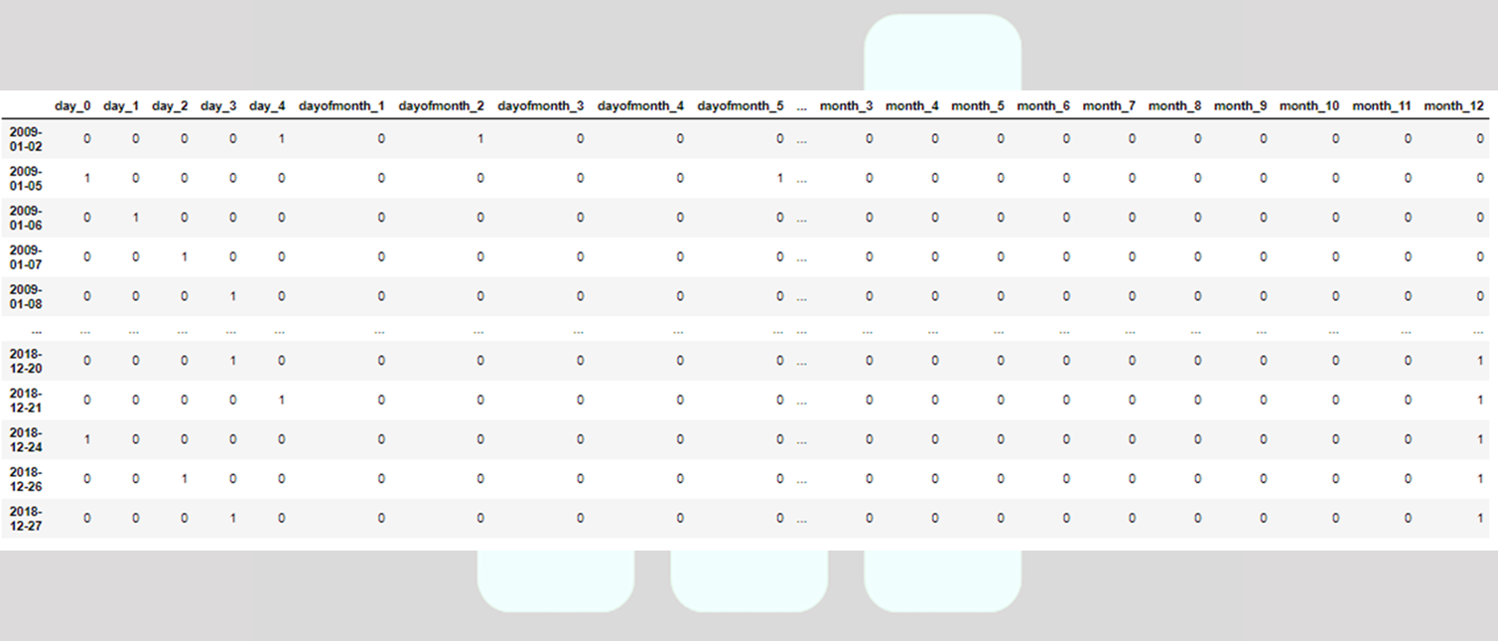

You should see something like this afer dummification and concatenation. 

<strong>Hint: "concatenate dataframe pandas" </strong>

In [ ]:
# Step 4: Concatenate your dummified columnar data

### Step 5: Prepare the final version of the DataFrame
After getting the concatenated dummies, the last step is to concatenate the the DataFrame containing the price information and the concatenated dummies. 

From the original DataFrame containing the prices, we just need:
1. "1. open"
2. "4. close"
3. "5. volume"

Take that, and combine it with the DataFrame from Step 4.

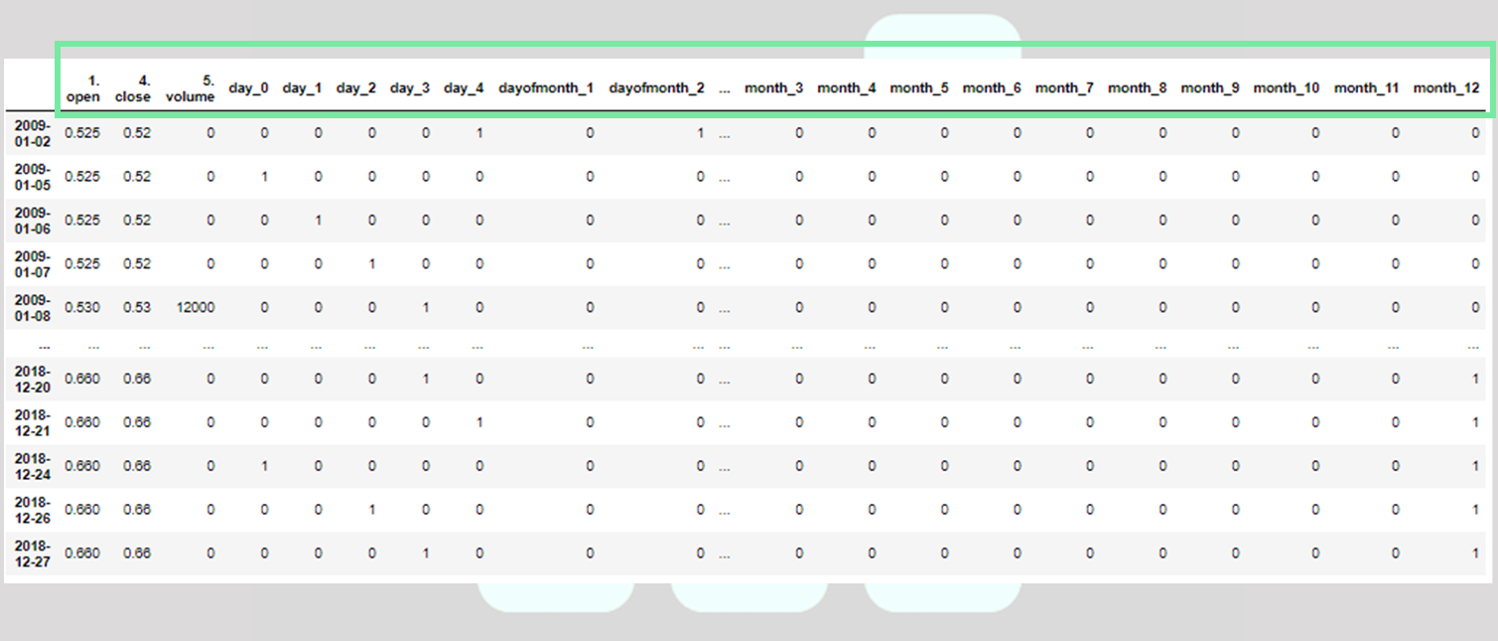

In [ ]:
# Step 5: Get your final DataFrame

### Step 6: Prepare your independent and dependent variables
Once you're done with the final dataset, time to split them once more. In our case, our dependent variable is the close price and the independent variables are everything else besides the close price.

1. Declare a variable, and assign your independent variables to it, i.e. drop "4. close" from the DataFrame from Step 5
2. Declare a variable, and assign only values from "4. close"

In [17]:
# Step 6: Prepare your independent and dependent variables

col =['1. open', 'day', 'day_of_month', 'month']

In [19]:
#X is a matrix (independent variables)
#y is scalar
X = df[col]
X
y = df['4. close']
y

2020-09-08    0.5081
2020-09-04    0.5081
2020-09-03    0.5081
2020-09-02    0.5081
2020-09-01    0.5081
               ...  
2007-07-19    0.7900
2007-07-18    0.8000
2007-07-17    0.8000
2007-07-16    0.8000
2007-07-13    0.8000
Name: 4. close, Length: 3290, dtype: float64

### Step 7: Import machine learning libraries
Time to import other libraries. We hope you've taken a look at the two articles at the start of this notebook because it'll be useful. 

Import the following libraries and methods:
1. train_test_split - sklearn.model_selection
2. LinearRegression - sklearn.linear_model
3. DecisionTreeRegressor - sklearn.tree
4. RandomForestRegressor - sklearn.ensemble
5. mean_squared_error - sklearn.metrics


In [20]:
# Step 7: Import the libraries that you need
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

### Step 8: Split your indepedent and dependent variables into train and test sets
We'll be using a 80/20 split for train and test set respectively, using the train_test_split function.

In [21]:
# Step 8: Split your data into train and test

X_train, X_train, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Step 9: Train your machine learning model
Once you've split your data, machine learning begins. 

This is what you'll need to do:
1. Pick any models you like from the three: LinearRegression, DecisionTreeRegressor, RandomForestRegressor
2. Declare a variable, and store your model in it (don't forget to use brackets)
3. Fit your training data into the instantiated model
4. Declare a variable that contains predictions from the model you just trained, using the train dataset (X_test)

The recommended readings will be very helpful.

In [23]:
# Step 9a: Declare a variable to store your chosen model

# Step 9b: Fit your train dataset

# Step 9c: Declare a variable and store your predictions using X test data

tree = DecisionTreeRegressor()




In [24]:
tree.fit(X_train, y_train)

tree_pred 

ValueError: Number of labels=2632 does not match number of samples=658

### Step 10: Assess your model performance
We'll be using two ways to assess our model.

1. Scatter plot comparing the actual values of the dependent variable and the predictions
2. The root mean-squared-error (RMSE) score

Hint: For RMSE, you'll square root the mean_squared_error results - you'll need something from numpy

In [26]:
# Step 10a: Print the RMSE between the y test and the prediction

# Step 10b: Plot test dependent variables vs predictions


print(py.sqrt(mean_squared_error(y_test, tree_pred)))

plt.scatter(y_test, tree_pred)

NameError: name 'tree_pred' is not defined

### Wait a minute...
<em>Nice</em> - looks like not only is the RMSE low, it seems like that the predictions line up with the actual values that you were trying to predict for. Our model is excellent. 

But, if you realized by now - there's a problem. We randomly sampled data from different dates from the dataset. This means we aren't exactly doing it right since this is a time series data. 

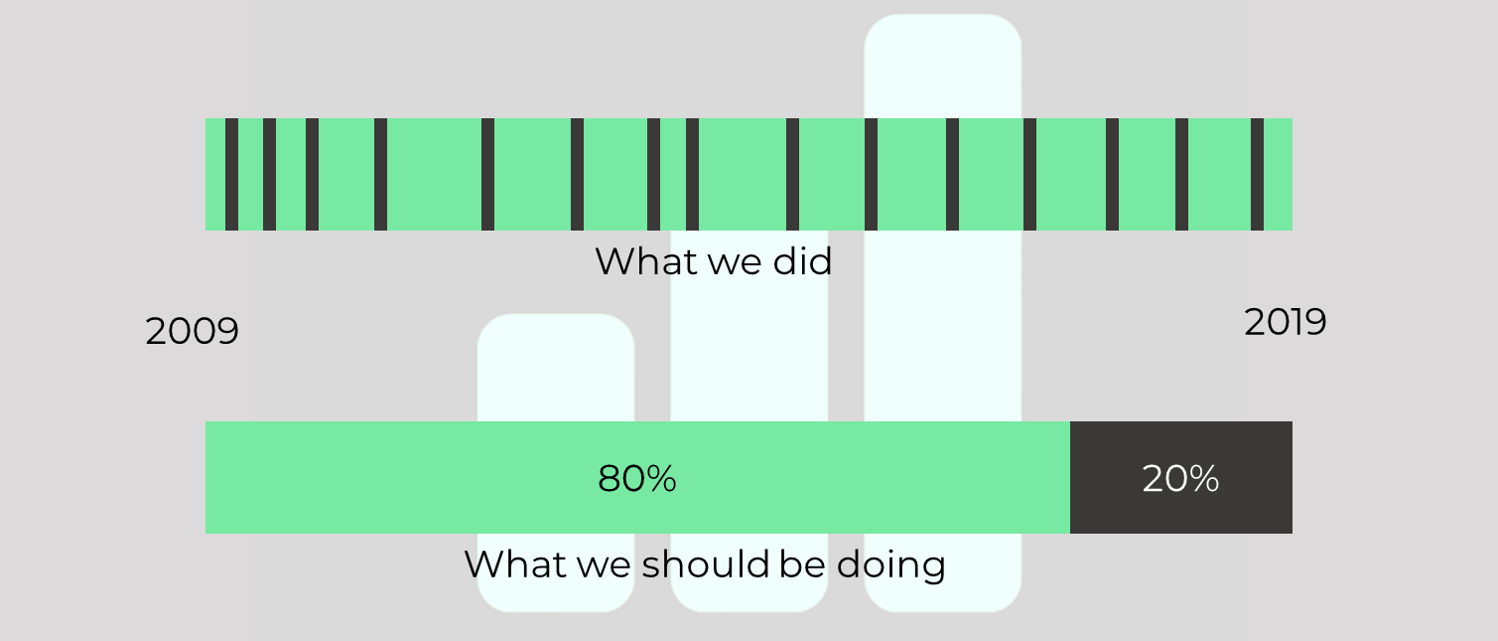
Green - Train, Black - Test

For a dataset with time T, we should split it instead such that we train our model using data all the way to 0.8T, and use the model to predict the price from 0.8T onwards.

### Step 11: Split the data based on time
From the diagram, it's time to split the train data from Step 6 non-randomly.

To do so, <strong>slice</strong> the data such that:
1. Train data for X and y is the first 80%
2. Test data for X and y is the last 20%

These will be your new train and test dataset!

<strong>Hint: len() function is your friend</strong>

In [ ]:
# Step 11: Slice your DataFrame based on time

### Step 12: Repeat Steps 9-10 with your new train and test data
We'll retrain the model and make new prediction.

Then you'll assess the model performance again with RMSE and the scatter plot.

In [ ]:
# Step 12a: Declare a variable to store your chosen model

# Step 12b: Fit your train dataset

# Step 12c: Declare a variable and store your predictions using X test data

# Step 12d: Print the RMSE between the y test and the prediction

# Step 12e: Plot test dependent variables vs predictions


### Step 13: Plot the lineplot with the actual and predicted prices
On top of using RMSE and plotting the scatter plot between actual and predicted prices, we can also plot the time series data. 

We will overlay the prediction over the test data to see how agreeable those two are.

Here's what you need to do:
1. Create a Series/DataFrame containing the predicted values
2. Assign the DataTime found in the test data as the index of the Series/DataFrame you just created
3. Plot "4. close" from your train data from t=1 to t=0.8T (where T is time from 2009 to 2019)
4. Plot "4. close" test data from your test data from t=0.8T to t=T
5. Plot your prediction

We won't spoil it here, but you'll be pleasantly surprised.

In [ ]:
# Step 13a: Create a Series/DataFrame containing the prediction
# let the index is the same as the test data's DateTime

In [ ]:
# Step 13b: Plot your close price from train data, test data, and finally your prediction from the DataFrame in 13a